## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import pairwise_distances
%matplotlib inline

## The Datas

In [2]:
def scl_pick(name, data):
    """
    the several option for name:
    -std
    -minmax
    -robust
    -norm
    -pwr
    """
    if name == 'std':
        std_scl = StandardScaler().fit(data)
        df_scl = std_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'minmax':
        MM_scl = MinMaxScaler().fit(data)
        df_scl = MM_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'robust':
        rb_scl = RobustScaler().fit(data)
        df_scl = rb_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    elif name == 'norm': ##### xxxxxx
        df_norm = Normalizer().fit(data)
        df_scl = df_norm.transform(data)
        df_scl = pd.DataFrame(df_scl)
    else:
        pt_scl = PowerTransformer().fit(data)
        df_scl = pt_scl.transform(data)
        df_scl = pd.DataFrame(df_scl)
    return df_scl

In [3]:
train_normal = pd.read_csv('./data/normal_training.csv')

In [4]:
test_faulty = pd.read_csv('./data/faulty_testing.csv')

In [5]:
# data preparing
df_train = train_normal[(train_normal.simulationRun>=1)].iloc[:500,3:]

In [6]:
IDV = 1
df_test = test_faulty[(test_faulty.faultNumber==IDV) & 
                               (test_faulty.simulationRun==1)].iloc[:,3:]

In [7]:
dt_trn = scl_pick('std', df_train)

In [8]:
dt_trn

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.007459,0.343859,0.502126,-1.431359,-0.084087,0.278542,-0.009557,-0.292773,0.510938,0.098431,...,-0.488936,0.000962,1.050090,-0.051818,-0.122736,1.319983,0.471559,-0.720571,0.279630,0.250397
1,0.017875,-0.103316,1.215653,1.035368,-0.866377,1.068875,0.107804,-0.032734,0.510938,-0.071378,...,-1.237481,-0.024152,-1.590601,-0.185906,0.049624,0.089123,-1.227605,-0.760505,0.460598,-0.634866
2,-0.007459,-0.075750,-0.821517,1.240929,-0.149278,-1.229449,0.308995,-0.467397,1.023929,-0.120262,...,0.901543,0.004238,0.029987,0.562959,0.098256,0.231510,0.029317,-0.740779,0.173916,1.722067
3,-0.029225,-0.045122,0.065220,1.685042,-0.694087,-1.261244,0.476653,0.392438,-0.515042,-0.128838,...,-0.030736,0.025713,-1.110695,0.302375,0.107554,-0.068286,0.381272,-0.649365,0.969458,-0.002535
4,1.550795,0.497001,-0.325151,-0.085064,-0.084087,1.404994,0.124570,0.703725,-0.515042,-0.918704,...,-0.684011,1.507821,-0.418568,-0.532509,-0.688446,1.199804,0.424744,-0.799476,0.725778,0.260288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.163035,-0.333028,-0.133843,1.615252,-1.429812,-0.130251,0.476653,-0.748315,-0.002052,-1.133966,...,0.391172,-0.360829,-1.326130,0.818484,-0.825761,-1.564979,-0.596009,0.429321,-0.080515,-1.161925
496,-0.571599,0.006947,0.515052,-0.010199,-0.163247,0.423891,-0.043088,0.200731,-0.002052,1.501493,...,0.155266,-0.683676,-0.539952,0.201177,2.053568,-0.086248,-1.668594,0.513518,0.424762,-0.464596
497,-0.710404,-0.195201,-0.428561,-0.596428,0.060264,0.887190,-0.680190,-0.142824,-0.515042,1.848829,...,1.146522,-0.544637,0.694782,-1.311733,1.699552,0.893150,0.064011,0.524584,0.313673,0.157137
498,-0.283998,-0.927219,0.308233,0.592525,0.227898,-0.107540,-0.411937,-0.222544,-1.541023,0.303401,...,1.298499,-0.461651,1.548485,1.273875,-0.392360,-0.127070,0.350758,0.627545,-0.976396,0.780990


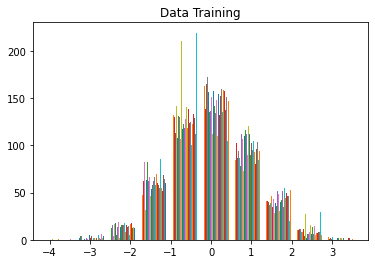

In [9]:
plt.hist(dt_trn)
plt.title('Data Training')
plt.show()

In [10]:
dt_tst = scl_pick('std', df_test)

In [11]:
dt_tst

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-2.032077,0.274369,-0.283462,2.131759,0.748241,0.700908,-0.043226,-0.291872,0.518418,0.665952,...,0.964565,-2.043364,0.649894,0.182801,0.666129,0.610804,0.624495,-1.014017,1.495361,-1.732594
1,-2.029050,-0.573262,1.206104,1.795302,0.478652,1.171492,-0.057380,0.078948,-1.017636,0.737980,...,-0.531646,-2.046391,0.988141,0.219955,0.596054,-0.514721,-0.615276,-0.997290,-0.667563,-1.274026
2,-2.047981,-0.548001,0.315856,1.366896,0.143989,-0.111161,-0.117536,-0.498980,-1.017636,0.693132,...,0.361195,-2.027102,1.066886,0.077973,0.638898,1.200694,-0.821408,-0.999194,0.434172,1.529115
3,-2.032942,-0.963397,0.487505,1.520488,0.478652,0.105391,-0.103382,-0.182401,-1.017636,0.668670,...,0.190200,-2.042094,1.633316,-0.066664,0.663224,0.608173,0.664022,-1.002424,-0.350185,-0.597031
4,-2.195823,-0.191547,1.239561,1.430950,0.023139,0.405232,0.031084,-0.656776,0.006400,-0.026248,...,-0.485233,-2.177751,1.625710,0.219292,-0.224509,0.025846,-0.768281,-0.994971,0.081841,0.398023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.420413,-0.368371,-0.091448,-0.227229,-1.547917,0.446877,-0.138768,-0.853035,-0.505618,-0.517764,...,0.783799,0.415853,-0.042707,-0.147607,-0.591221,-0.228326,0.884180,-0.761368,-1.359642,0.468916
956,0.369002,0.007730,-0.295099,-0.777890,1.431511,-1.418800,-0.160000,0.702243,0.518418,-1.026494,...,0.328217,0.370634,0.053935,-0.173482,-0.701235,-0.974401,0.322309,-0.763355,0.674652,0.265818
957,0.365206,-0.758506,0.102021,0.415724,-0.014046,0.505179,-0.206001,-0.555195,-1.017636,-0.903275,...,-0.069958,0.374442,-1.649381,-0.188079,-0.822141,-0.492033,-0.282913,-0.758055,-0.740266,1.810132
958,0.405422,-0.222421,-0.175818,-0.242726,0.399634,0.197009,-0.276773,-0.541387,-1.529654,-0.037573,...,-0.477905,0.413753,-1.162144,-0.351292,-0.187112,0.118243,-0.102282,-0.787784,-1.105180,1.183593


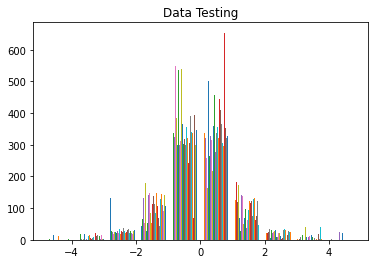

In [12]:
plt.hist(dt_tst)
plt.title('Data Testing')
plt.show()

In [13]:
nComponent = 16 # 30
nSamples = dt_trn.shape[0]
conf_T2 = 0.95 # 0.99 or 0.95

## Training Centraling kernel

In [14]:
# training proccess
A = dt_trn
# K = np.matmul(A, A.T)
K = A@A.T

In [15]:
K = round(K, 4)

In [16]:
K = pd.DataFrame(K)
K.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,11.2546,-1.0061,0.0674,-2.9111,7.1808,2.8010,0.0057,1.4510,0.4063,1.5802,...,0.5930,3.8502,-9.1364,4.2919,-3.3995,-10.6717,-3.1036,5.0830,-1.1397,-2.0652
1,-1.0061,15.6481,-1.6439,5.6558,2.5903,-0.4408,6.0022,4.6069,-2.4341,2.6042,...,0.9103,1.0257,-2.7119,0.1541,0.3194,8.1394,5.3727,-5.6364,-8.4340,-1.2430
2,0.0674,-1.6439,26.7531,17.8784,-0.3144,5.1255,3.0532,9.6956,-6.1012,3.9284,...,6.0349,5.8823,9.4580,-6.5917,5.7670,-1.7374,-1.2486,-3.1189,-1.1444,-3.6523
3,-2.9111,5.6558,17.8784,28.0756,-1.2179,1.0285,7.3694,7.8788,-6.3967,-0.0440,...,4.3926,5.6318,7.7203,0.8116,2.4675,7.4404,0.0878,-8.0281,-7.5140,1.3202
4,7.1808,2.5903,-0.3144,-1.2179,40.4632,34.7838,-1.6998,-4.6655,5.3079,4.0269,...,2.6487,6.9229,-7.3993,0.6240,1.2561,-2.8091,-0.0297,7.9712,-3.6725,2.6617


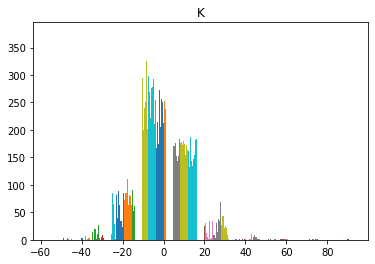

In [17]:
plt.hist(K)
plt.title('K')
plt.show()

In [18]:
s = (nSamples, nSamples)
unit = np.ones(s)/nSamples

In [19]:
#######
unit = pd.DataFrame(unit)

In [20]:
unit = round(unit, 4)

In [21]:
unit.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [22]:
K_c = K-unit@K-K@unit+unit@K@unit

In [23]:
K_c = round(K_c, 4)

In [24]:
K_c.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,11.2546,-1.0061,0.0674,-2.9111,7.1808,2.8010,0.0057,1.4510,0.4063,1.5802,...,0.5930,3.8502,-9.1364,4.2919,-3.3995,-10.6717,-3.1036,5.0830,-1.1397,-2.0652
1,-1.0061,15.6481,-1.6439,5.6558,2.5903,-0.4408,6.0022,4.6069,-2.4341,2.6042,...,0.9103,1.0257,-2.7119,0.1541,0.3194,8.1394,5.3727,-5.6364,-8.4340,-1.2430
2,0.0674,-1.6439,26.7531,17.8784,-0.3144,5.1255,3.0532,9.6956,-6.1012,3.9284,...,6.0349,5.8823,9.4580,-6.5917,5.7670,-1.7374,-1.2486,-3.1189,-1.1444,-3.6523
3,-2.9111,5.6558,17.8784,28.0756,-1.2179,1.0285,7.3694,7.8788,-6.3967,-0.0440,...,4.3926,5.6318,7.7203,0.8116,2.4675,7.4404,0.0878,-8.0281,-7.5140,1.3202
4,7.1808,2.5903,-0.3144,-1.2179,40.4632,34.7838,-1.6998,-4.6655,5.3079,4.0269,...,2.6487,6.9229,-7.3993,0.6240,1.2561,-2.8091,-0.0297,7.9712,-3.6725,2.6617


In [25]:
# Compute Eigenvalues and Eigenvector
# eigvls, eigvct = np.linalg.eig(K_c) # K_c
u, s, vh = np.linalg.svd(K_c/nSamples)

In [26]:
# LAMBDA
lambda_ = s
lambd = lambda_

In [27]:
# COEFFICIENT
cf = np.sqrt(nSamples*lambd)
coefficient = np.divide(u, cf.T) # u
# coefficient = np.divide(vh, cf.T) # vh

In [28]:
# eigvls = eigvls.real
eigvls = lambd

In [29]:
# eigvct = eigvct.real
eigvct = coefficient

In [30]:
eigvct = pd.DataFrame(eigvct)

In [31]:
eigvct.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,-0.000105,0.000477,-0.000122,0.000811,-0.001505,0.000064,-0.001167,0.000629,-0.000325,0.001204,...,10.083152,7.496293,-6.524933,17.754944,-10.137464,9.398385,-14.582244,-12.176828,-43.442538,20.996854
1,-0.000178,0.000106,0.000391,-0.001443,-0.000515,0.000089,0.000312,-0.000700,0.001253,-0.001811,...,7.171127,-6.085880,-13.487047,1.368614,-18.415453,3.122767,-12.763626,-2.383554,-10.051432,49.627076
2,-0.000149,0.000125,0.000719,0.001335,-0.000942,-0.002309,0.000356,-0.000370,0.001192,-0.001477,...,8.923839,-10.229764,8.474007,14.667617,8.471012,-5.260246,-9.264575,25.567977,9.018188,20.400687
3,-0.000174,0.000067,0.000574,0.000236,-0.000009,-0.000804,0.000018,0.000073,0.002019,-0.002369,...,-0.780264,-4.667133,8.841610,16.247365,-10.739974,-2.740979,28.547725,11.045431,25.301894,34.202195
4,-0.000287,0.000859,0.000617,0.000668,-0.001292,0.001648,-0.001265,0.001282,-0.001864,-0.000639,...,-6.327189,-7.815692,5.273028,-7.071183,24.137368,2.821445,-20.565573,31.546764,-5.530525,-63.019382


In [32]:
eigvls = pd.DataFrame(eigvls)

In [33]:
eigvls = round(eigvls, 4)

In [34]:
eigvls.head()

,0
0,7.4157
1,4.8772
2,2.9170
3,2.2630
4,2.0917


In [35]:
 eigvct.iloc[:,:nComponent]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.000105,0.000477,-0.000122,0.000811,-0.001505,0.000064,-0.001167,0.000629,-0.000325,0.001204,-0.000408,0.001098,-0.000510,0.000348,-0.000891,0.000208
1,-0.000178,0.000106,0.000391,-0.001443,-0.000515,0.000089,0.000312,-0.000700,0.001253,-0.001811,0.000260,-0.000407,-0.000771,-0.000451,0.001210,-0.001233
2,-0.000149,0.000125,0.000719,0.001335,-0.000942,-0.002309,0.000356,-0.000370,0.001192,-0.001477,0.001862,-0.000898,-0.000665,0.001869,0.001183,0.001428
3,-0.000174,0.000067,0.000574,0.000236,-0.000009,-0.000804,0.000018,0.000073,0.002019,-0.002369,0.001528,0.000125,0.000476,0.001006,0.001898,0.001115
4,-0.000287,0.000859,0.000617,0.000668,-0.001292,0.001648,-0.001265,0.001282,-0.001864,-0.000639,0.000299,-0.003548,0.000587,-0.001548,-0.001637,0.001718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.000256,-0.000719,0.000564,-0.001085,0.002197,0.001234,0.002049,0.000149,0.001369,-0.003077,0.000878,0.001117,0.002107,-0.001239,0.001061,-0.001238
496,-0.000051,-0.000723,0.000010,-0.002209,-0.000266,-0.001866,-0.001186,-0.001148,0.000779,-0.000153,0.000680,0.000533,0.000979,-0.002007,0.000251,0.000520
497,0.000190,-0.000349,-0.000977,-0.000453,-0.000839,-0.001561,-0.003574,0.000513,-0.001148,0.000184,0.001021,0.000055,0.001349,-0.002050,-0.002169,0.000764
498,-0.000042,-0.000170,-0.001113,0.000964,0.000718,-0.000604,-0.000384,-0.000127,-0.002323,0.000124,0.000912,0.001587,0.002913,-0.000787,0.000197,-0.001817


In [36]:
# score matrix
# score_train = np.matmul(K_c, eigvct.iloc[:,:nComponent])
score_train = K_c@eigvct.iloc[:,:nComponent]

In [37]:
score_train = round(score_train, 4)

In [38]:
score_train = pd.DataFrame(score_train)

In [39]:
score_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.3890,1.1623,-0.1784,0.9177,-1.5744,0.0625,-1.1179,0.5124,-0.2487,0.8591,-0.2701,0.7001,-0.3089,0.2011,-0.5087,0.1123
1,-0.6599,0.2576,0.5698,-1.6324,-0.5389,0.0869,0.2991,-0.5701,0.9584,-1.2918,0.1722,-0.2593,-0.4675,-0.2611,0.6911,-0.6665
2,-0.5514,0.3050,1.0482,1.5101,-0.9849,-2.2676,0.3406,-0.3014,0.9113,-1.0536,1.2337,-0.5730,-0.4030,1.0813,0.6757,0.7721
3,-0.6455,0.1636,0.8370,0.2675,-0.0092,-0.7891,0.0169,0.0593,1.5440,-1.6896,1.0119,0.0800,0.2884,0.5822,1.0841,0.6028
4,-1.0660,2.0936,0.9006,0.7556,-1.3513,1.6183,-1.2116,1.0441,-1.4258,-0.4561,0.1984,-2.2627,0.3561,-0.8953,-0.9349,0.9291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-0.9481,-1.7525,0.8231,-1.2280,2.2978,1.2122,1.9624,0.1210,1.0467,-2.1946,0.5813,0.7122,1.2771,-0.7165,0.6059,-0.6695
496,-0.1893,-1.7633,0.0140,-2.4990,-0.2784,-1.8322,-1.1354,-0.9352,0.5958,-0.1090,0.4507,0.3397,0.5937,-1.1611,0.1433,0.2810
497,0.7030,-0.8516,-1.4245,-0.5130,-0.8777,-1.5329,-3.4224,0.4179,-0.8778,0.1314,0.6761,0.0350,0.8179,-1.1857,-1.2387,0.4130
498,-0.1561,-0.4147,-1.6232,1.0913,0.7514,-0.5931,-0.3676,-0.1032,-1.7764,0.0884,0.6038,1.0120,1.7659,-0.4551,0.1126,-0.9823


In [40]:
### T2 training Process
a = eigvls.iloc[:nComponent,:]
# b = np.zeros((nComponent, nComponent), int)
# np.fill_diagonal(b, a)
# fill the diagonal not in real number
# good if the number is double format !!!!!!!!!!!!!!!!!!!!!!

In [41]:
z = a.values.tolist()

In [42]:
extract_egv=[]
for i in range(len(z)):
    extract_egv.append(z[i][0])
#     print(z[i][0])


In [43]:
c = np.diag(extract_egv)

In [44]:
c

array([[7.4157, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 4.8772, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 2.917 , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 2.263 , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 2.0917, 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.9641, 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 1.9152, 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.

In [45]:
invegvldiag = c

In [46]:
invegvldiag = pd.DataFrame(invegvldiag)

In [47]:
invegvldiag

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,7.4157,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
1,0.0000,4.8772,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
2,0.0000,0.0000,2.917,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
3,0.0000,0.0000,0.000,2.263,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
4,0.0000,0.0000,0.000,0.000,2.0917,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
5,0.0000,0.0000,0.000,0.000,0.0000,1.9641,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
6,0.0000,0.0000,0.000,0.000,0.0000,0.0000,1.9152,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
7,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,1.6285,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
8,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,1.5295,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000
9,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,1.4266,0.0000,0.0000,0.0000,0.000,0.0000,0.0000


In [48]:
T2_train = score_train@invegvldiag@score_train.T

In [49]:
T2_train.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,20.064105,-2.262551,5.407219,-0.621797,22.363951,17.507985,0.932204,2.831217,2.608601,-0.406580,...,-1.757866,2.538031,-13.639424,4.639330,-5.413831,-25.435154,-13.064147,3.670716,-0.116161,1.077978
1,-2.262551,17.133568,4.070493,9.261054,4.893655,7.825935,5.035958,11.818918,1.460069,8.467569,...,-0.837000,0.279551,-0.098166,-6.642341,8.624941,12.900034,9.174353,-9.370592,-10.579907,-10.265188
2,5.407219,4.070493,31.577291,18.086026,6.518820,9.331773,1.146271,12.290549,-7.690971,11.687549,...,12.871801,8.760264,0.256256,-25.337943,8.949570,-5.746522,-1.808811,-6.888039,-4.835054,2.449433
3,-0.621797,9.261054,18.086026,17.967245,3.745784,4.694944,1.299490,7.997788,-7.444986,8.436469,...,5.379144,4.783717,-3.579993,-16.081800,8.585188,11.449923,2.833269,-8.767937,-5.688617,6.111795
4,22.363951,4.893655,6.518820,3.745784,60.013921,58.820148,-3.527804,0.487346,15.302747,10.633613,...,-6.091384,2.603225,-18.139193,0.092369,-0.654587,-20.110293,-25.238931,-7.387221,-7.549064,6.405594


In [50]:
# here the data is from training data 
# or with using same data
T2_tfinal = np.diag(T2_train)

In [51]:
T2_tfinal

array([ 20.06410534,  17.13356805,  31.57729109,  17.96724498,
        60.01392109,  73.57138485,  20.69971773,  26.75378575,
        45.55946068,  89.28672287,  50.20350996,  29.67039613,
        23.11270091,  46.31199509,  62.12537431, 123.63951942,
        37.79833929,  55.1352752 ,  62.11333084,  36.49453737,
        64.72843057,  57.29000657,  55.07678532,  62.31894957,
        79.22266171,  76.09582623,  66.93273191,  67.77945238,
        60.59398572,  51.43206619,  78.68884007, 104.30333661,
       130.42941681, 112.62942674, 124.79532463, 133.11724262,
       144.07527715, 118.88065709, 139.34458467, 162.44388393,
       140.73309231, 154.34073166,  83.61047055,  89.51163164,
        78.12363967, 188.4880916 , 129.97576039, 185.28078684,
        79.26185343, 100.64652289, 136.32125441, 124.85116109,
       121.85457456, 114.8956619 , 110.93928462, 116.65978355,
        87.99168579,  63.87952353, 116.86930556, 127.71046859,
       153.83640953, 179.95248007, 116.80480894, 136.71

In [52]:
from scipy.stats import f
F = f.ppf(conf_T2, nComponent, nSamples-nComponent)
T2_trlim = ((nComponent*(nSamples**2-1))/(nSamples*(nSamples-nComponent)))*F

In [53]:
T2_trlim
# conf_T2 = 0.95, T2_trlim = 47.3464294521146
# conf_T2 = 0.99, T2_trlim = 55.46204002064628

27.511202863723632

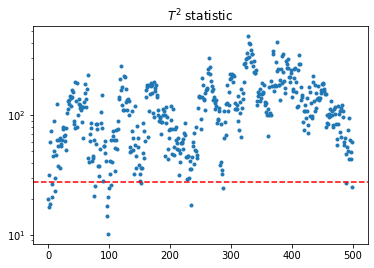

In [54]:
# plotting the result
plt.semilogy(T2_tfinal,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()
# in this scatter plot the data has been use is
# training data it self 

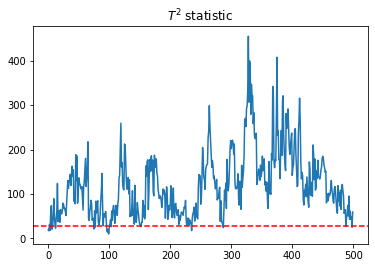

In [55]:
plt.plot(T2_tfinal)
plt.axhline(T2_trlim, ls='--',c='r')
plt.title('$T^2$ statistic')
plt.show()

In [56]:
print(f'T2: {(T2_tfinal>T2_trlim).sum()/T2_tfinal.shape[0]}')
# ofcourse 100% because we using train and test in the same dataset

T2: 0.962


## Testing Centraling kernel

In [57]:
# Kt = np.matmul(dt_tst, dt_trn.T)
Kt = dt_tst@dt_trn.T

In [58]:
Kt.shape

(960, 500)

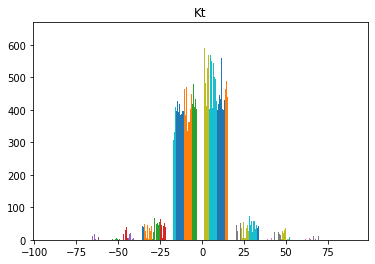

In [59]:
plt.hist(Kt)
plt.title('Kt')
plt.show()

In [60]:
# centralize the kernel
st = (len(dt_tst),len(dt_trn)) # 2000 or 960
unit_t = np.ones(st)/len(dt_trn)

In [61]:
#######
unit_t = pd.DataFrame(unit_t)

In [62]:
unit_t = round(unit_t, 4)

In [63]:
unit_t

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
1,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
2,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
3,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
4,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
956,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
957,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002
958,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002


In [64]:
Kt_c = Kt-unit_t@K-Kt@unit+unit_t@K@unit
# the result are NaN

In [65]:
Kt_c = round(Kt_c, 4)

In [66]:
Kt_c

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,2.4530,4.3054,1.3759,7.2145,-1.4292,-6.1071,2.3902,5.1367,-5.3870,-2.2791,...,-1.8537,9.2173,-0.4432,10.6098,-0.2320,3.3782,4.6646,6.5535,-1.6587,6.0177
1,-0.8094,9.5179,-3.1323,6.8556,-5.5912,-11.5055,9.4154,8.8133,-1.6203,-11.7466,...,-1.6224,-3.4886,-1.5753,-1.6792,-5.0666,7.7826,7.0897,1.9148,1.5971,5.4541
2,4.8952,2.7730,11.2608,6.5052,-3.0609,-5.0393,3.5208,8.8861,-1.3274,-5.0843,...,1.5133,0.0921,3.6921,-7.8232,2.2719,-7.1014,5.7336,9.2605,2.9299,-1.9654
3,3.5139,1.3220,2.9945,7.5377,-5.0917,-8.4382,4.8114,6.0916,-1.9661,-8.0509,...,-0.6172,0.6054,1.3821,3.6287,-3.2030,-3.1160,2.7866,7.9140,2.5580,3.7401
4,2.2301,5.4197,3.7703,-0.0298,-4.6229,-4.7862,7.2590,6.4673,-6.6559,-0.5958,...,0.3223,-1.4271,-10.2959,-12.4007,3.5146,2.6894,5.0467,-0.7757,1.8140,-3.7787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,1.0534,-1.9615,5.3656,1.8945,4.2108,5.1793,1.8477,-1.8662,2.4259,4.7404,...,1.9197,-2.0060,5.4481,4.4486,3.0770,4.1036,-3.9061,-1.0129,3.3209,-0.5290
956,-0.2895,-2.7420,4.1787,5.4836,-1.8574,2.2897,0.7738,2.6914,9.4666,7.0554,...,-3.1762,-4.7290,1.6565,-5.1071,5.9790,6.2771,-5.8883,-8.4329,-1.9454,0.9830
957,-1.7307,2.8189,6.5509,4.1347,4.1093,7.8311,0.8544,1.7680,8.9512,3.6845,...,-0.4146,-6.3061,6.6734,-9.4104,7.6589,6.6278,-3.5643,-3.8402,3.7643,6.9524
958,1.1564,0.4062,9.6408,6.2806,6.8070,10.6484,3.1349,2.5027,7.5568,-2.3135,...,0.2509,-5.2098,6.4856,0.8537,3.3475,-1.1906,-2.9053,0.6462,2.6135,1.8019


In [67]:
# score_test = np.matmul(Kt_c, eigvct.iloc[:,:nComponent])
score_test = Kt_c@eigvct.iloc[:,:nComponent]

In [68]:
score_test = round(score_test, 4)

In [69]:
score_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.3604,-0.2531,-0.6993,-0.8177,0.0786,0.6856,-2.7665,0.9577,2.2987,-0.9493,-0.3551,0.8932,-1.1865,0.9162,1.6474,0.3252
1,-1.3918,-0.1098,-1.6372,-1.7064,1.0007,-0.6040,-1.1605,0.0020,0.7224,-1.0358,-1.1129,0.6940,-0.3363,0.9507,1.8977,0.1879
2,-1.2030,-0.2892,-1.3112,0.9014,-1.8566,-3.2839,-0.8338,0.3293,0.2560,-0.6357,-1.0387,0.3357,-1.2612,0.2772,1.4411,-0.1846
3,-1.1054,-0.1619,-1.6170,0.3136,-0.0617,-0.7991,-2.2887,0.8294,0.5040,-0.5606,-1.4122,1.0158,-0.8953,0.8850,1.5574,0.1805
4,-1.7028,-0.3422,-1.4123,0.1468,-0.2329,-1.5461,0.4154,-0.1505,1.4497,-0.8796,-0.5451,0.8385,-1.5455,1.8495,0.4357,-0.6227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,0.1276,0.8878,-0.1162,1.2181,0.6203,0.0328,0.2410,0.0755,-0.2361,-0.4406,-0.1801,-0.0222,0.3148,0.9072,-0.6936,0.0421
956,0.0374,1.1344,0.9616,0.5681,1.0508,0.0905,1.6541,0.5334,0.2403,0.6899,0.2288,0.7499,-0.0726,-0.6365,0.8707,1.1648
957,0.1063,0.9899,0.2034,1.4146,0.2208,-1.3191,2.0086,-0.1075,-0.4928,-1.2571,0.3347,-1.3224,0.5357,-0.5876,0.2510,0.0718
958,0.5665,0.9899,-0.7404,1.1014,-0.5282,-1.0038,0.4503,-0.7093,-1.0642,-1.3173,1.3607,-1.0579,-0.3410,0.7862,0.2145,0.2647


In [70]:
T2_test = score_test@invegvldiag@score_test.T
T2_test_final = np.diag(T2_test)

In [71]:
T2_test = round(T2_test, 4)

In [72]:
T2_test

,0,1,2,3,4,5,6,7,8,9,...,950,951,952,953,954,955,956,957,958,959
0,50.5085,36.5622,21.0911,35.9764,27.9388,24.2821,38.8713,40.2541,13.0264,31.2285,...,3.2117,2.7787,-6.2690,-9.0105,10.4727,-6.3687,-10.2930,-20.4671,-14.3777,0.3874
1,36.5622,44.1408,24.1723,33.0329,32.2888,18.2509,38.1416,31.4382,19.7156,31.2420,...,-9.1236,-4.8017,-3.8255,-7.3047,3.5923,-5.2065,-8.3361,-11.1559,-8.6616,-9.2463
2,21.0911,24.1723,54.5690,33.6718,37.7798,52.6992,38.5817,36.2571,51.2329,36.7648,...,4.9368,3.6532,-14.9384,15.6086,-7.3106,-3.2213,-10.8904,3.4600,5.5811,-6.5231
3,35.9764,33.0329,33.6718,38.9320,29.5791,31.8670,39.0334,31.6649,26.8640,29.4202,...,3.6656,8.3199,-0.6634,2.0328,2.6901,-1.5802,-10.7621,-10.9529,-4.5145,-4.6875
4,27.9388,32.2888,37.7798,29.5791,46.2146,47.2491,36.0418,37.0339,38.2983,35.1386,...,-5.2494,-8.0904,-13.0816,-3.3369,-4.3546,-1.3246,-7.0129,-1.1959,-2.1227,-4.0005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,-6.3687,-5.2065,-3.2213,-1.5802,-1.3246,2.2256,-3.4014,-7.0965,1.9118,-6.2862,...,2.4704,7.4804,11.6476,0.3995,1.7287,10.3191,6.4568,9.6505,8.9347,4.3955
956,-10.2930,-8.3361,-10.8904,-10.7621,-7.0129,-6.2673,-5.1080,-9.7680,-2.5468,-11.2211,...,-0.9606,0.8702,8.2960,-8.0097,9.4641,6.4568,22.1056,12.5599,2.1548,7.1952
957,-20.4671,-11.1559,3.4600,-10.9529,-1.1959,7.6370,-8.2233,-11.2499,12.5971,-7.3740,...,-2.3549,2.0517,3.3167,4.8509,-1.7789,9.6505,12.5599,26.6071,17.4038,1.4517
958,-14.3777,-8.6616,5.5811,-4.5145,-2.1227,4.4683,-8.5740,-15.9390,10.2292,-2.1435,...,4.2621,10.9146,7.1344,15.1896,-3.9533,8.9347,2.1548,17.4038,24.3462,6.1000


In [73]:
T2_test_final = np.diag(T2_test)

In [74]:
T2_test_final

array([  50.5085,   44.1408,   54.569 ,   38.932 ,   46.2146,   72.6059,
         53.8104,   65.2114,   57.7364,   41.7339,   34.5675,   48.7248,
         51.7116,   54.5025,   42.833 ,   48.1341,   41.9566,   38.4563,
         69.1101,   37.982 ,   57.8793,   73.9602,   56.2166,   50.6768,
         65.3536,   35.4015,   51.4988,   51.0105,   52.8834,   66.0341,
         47.4038,   44.8141,   55.5371,   36.0899,   46.3372,   50.4559,
         51.9085,   42.7719,   24.61  ,   40.1115,   56.5666,   71.6126,
         31.5596,   37.4113,   49.8163,   26.2395,   58.2108,   41.8517,
         30.7517,   38.5998,   31.4436,   41.8592,   52.6668,   44.0196,
         51.8414,   54.733 ,   85.8205,   54.8576,   45.565 ,   46.7778,
         44.7996,   52.9644,   68.1844,   46.7768,   60.9264,   52.1995,
         39.837 ,   72.1015,   46.3527,   61.958 ,   59.3382,   98.249 ,
         44.687 ,   46.8891,   39.6582,   49.9282,   62.4079,   51.2108,
         57.7467,   48.8893,   66.8558,   45.9179, 

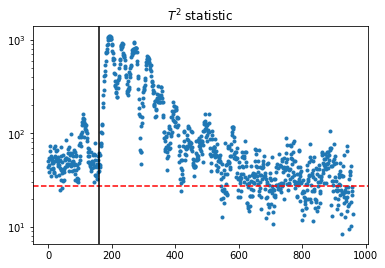

In [75]:
plt.figure(figsize=(6,4))
plt.semilogy(T2_test_final,'.')
plt.axhline(T2_trlim, ls='--',c='r')
plt.axvline(160, c='k')
plt.title('$T^2$ statistic')
plt.show()

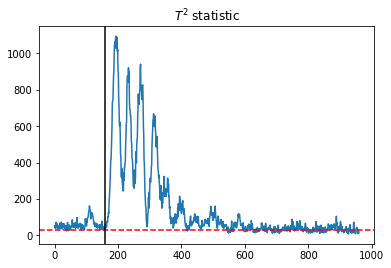

In [76]:
plt.figure(figsize=(6,4))
plt.plot(T2_test_final)
plt.axhline(T2_trlim, ls='--',c='r')
plt.axvline(160, c='k')
plt.title('$T^2$ statistic')
plt.show()

In [77]:
print(f'T2: {(T2_test_final>T2_trlim).sum()/T2_test_final.shape[0]}')

T2: 0.853125
